# **(ADD HERE THE NOTEBOOK NAME)**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction'

# Load Data


Section 1 content

In [4]:
import pandas as pd

df_movies = pd.read_csv('encoded_movies.csv')

print(df_movies.head().to_string(index=False))

   budget    revenue  Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  Fantasy  Foreign  History  Horror  Music  Mystery  Romance  Science Fiction  TV Movie  Thriller  War  Western  language_encoded
237000000 2787965087       1          1          0       0      0            0      0       0        1        0        0       0      0        0        0                1         0         0    0        0                 0
300000000  961000000       1          1          0       0      0            0      0       0        1        0        0       0      0        0        0                0         0         0    0        0                 0
245000000  880674609       1          1          0       0      1            0      0       0        0        0        0       0      0        0        0                0         0         0    0        0                 0
250000000 1084939099       1          0          0       0      1            0      1       0        0      

---

# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business contextSection 2 content

In [5]:
pip install ydata-profiling


Note: you may need to restart the kernel to use updated packages.


In [6]:
from ydata_profiling import ProfileReport
import pandas as pd

df_movies = pd.read_csv('encoded_movies.csv')  
pandas_report = ProfileReport(df=df_movies, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

Subset data

In [7]:
# High revenue movies (top 25%)
high_revenue = df_movies[df_movies['revenue'] >= df_movies['revenue'].quantile(0.75)]

# Low revenue movies (bottom 25%)
low_revenue = df_movies[df_movies['revenue'] <= df_movies['revenue'].quantile(0.25)]

print("\nNumber of high revenue movies:", len(high_revenue))
print("Number of low revenue movies:", len(low_revenue))


Number of high revenue movies: 1201
Number of low revenue movies: 1427


 Calculate the Correlation Matrix

In [8]:

corr_matrix = df_movies.corr()
print("\nCorrelations with revenue:\n")
print(corr_matrix['revenue'].sort_values(ascending=False))


Correlations with revenue:

revenue             1.000000
budget              0.730823
Adventure           0.344400
Fantasy             0.212287
Action              0.203590
Animation           0.199335
Family              0.170067
Science Fiction     0.152621
War                 0.002046
Thriller           -0.004488
Mystery            -0.006796
TV Movie           -0.020634
Western            -0.029148
History            -0.031417
Crime              -0.040726
Music              -0.041550
Foreign            -0.042465
Comedy             -0.050369
Romance            -0.065368
Documentary        -0.068089
language_encoded   -0.077079
Horror             -0.082753
Drama              -0.177229
Name: revenue, dtype: float64


Visualize the Correlation

Plot should display revenue correlations heatmap


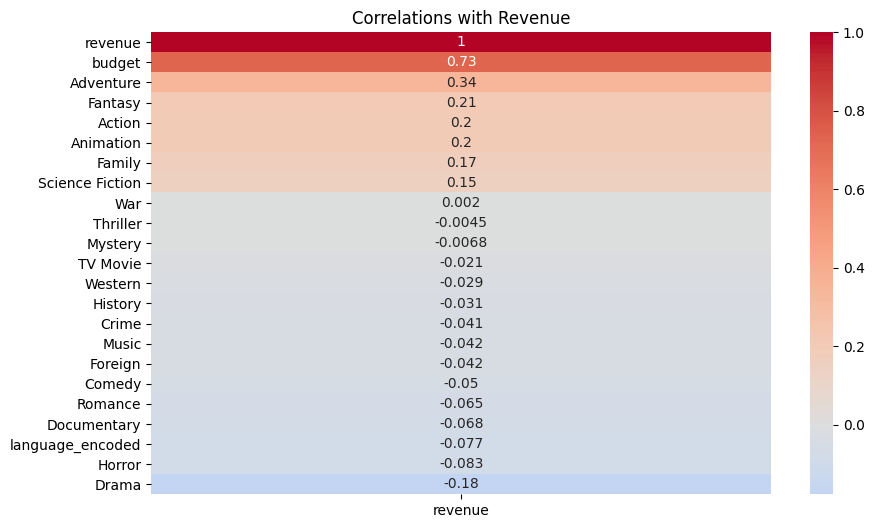

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.heatmap(df_movies.corr()[['revenue']].sort_values(by='revenue', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlations with Revenue')
print("Plot should display revenue correlations heatmap")

Barplot of Correlation with Revenue

Plot should display correlation barplot


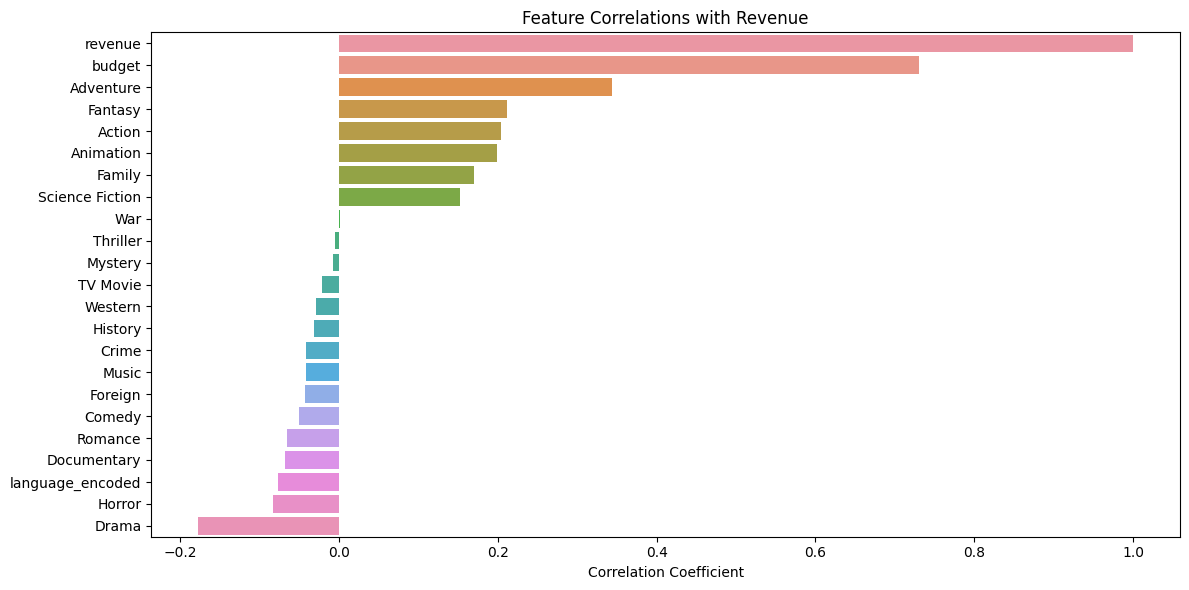

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
correlations = df_movies.corr()['revenue'].sort_values(ascending=False)
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlations with Revenue')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
print("Plot should display correlation barplot")

---

# Correlation budget revenue

Plot shows relationship between budget and revenue


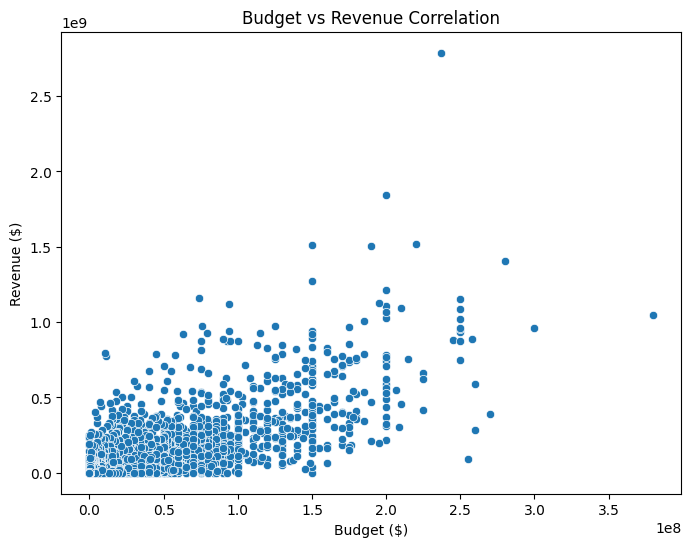

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_movies, x='budget', y='revenue')
plt.title('Budget vs Revenue Correlation')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
print("Plot shows relationship between budget and revenue")

Plot shows scatter points, trend line (red), and average revenue line (green)


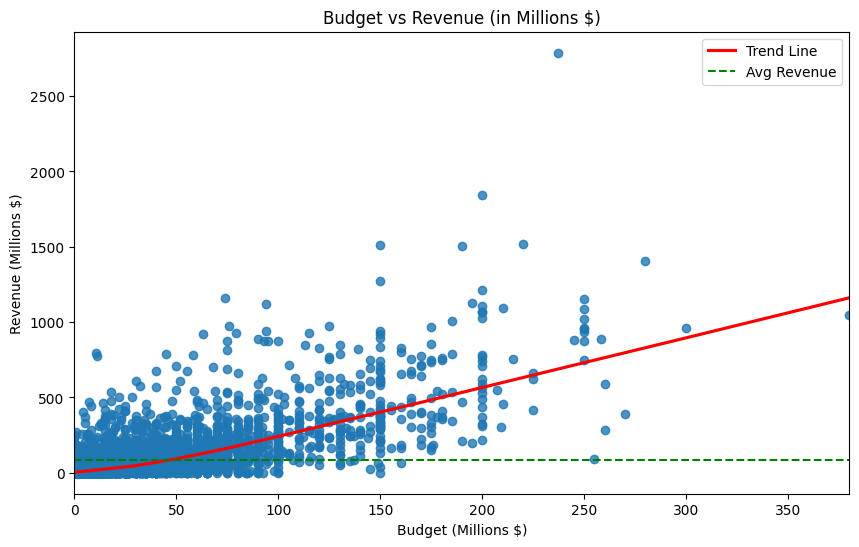

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_millions, x='budget_millions', y='revenue_millions', 
           scatter=True, lowess=True, 
           line_kws={'color': 'red', 'label': 'Trend Line'})
plt.axhline(y=df_millions['revenue_millions'].mean(), 
           color='green', linestyle='--', label='Avg Revenue')
plt.title('Budget vs Revenue (in Millions $)')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Revenue (Millions $)')
plt.legend()
print("Plot shows scatter points, trend line (red), and average revenue line (green)")

---

# EDA on selected variables

Plot should display distributions


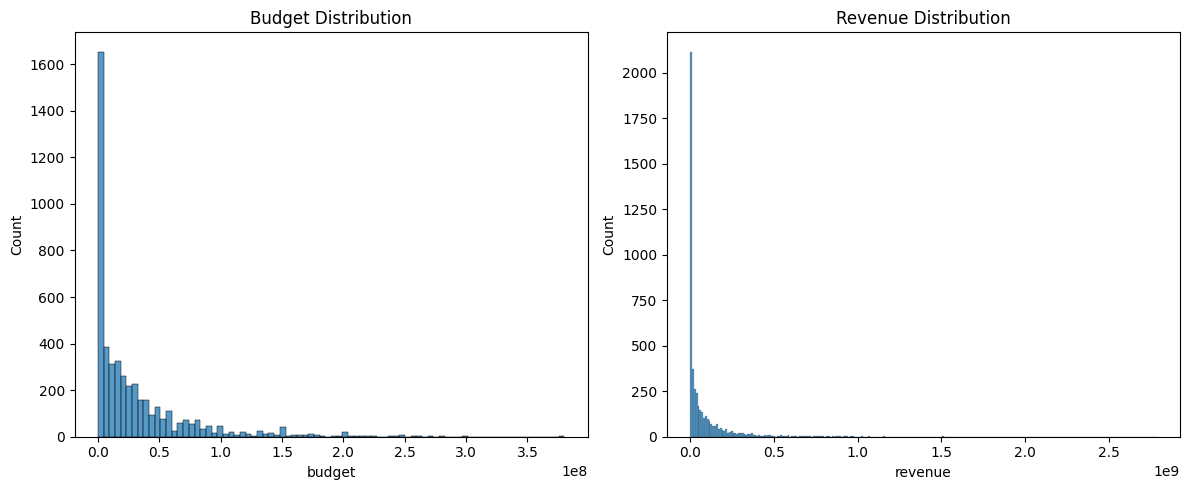

In [14]:
# For budget and revenue distributions:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_movies['budget'])
plt.title('Budget Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_movies['revenue'])
plt.title('Revenue Distribution')
plt.tight_layout()
print("Plot should display distributions")

---

## Variables Distribution by Churn

We plot the distribution (numerical and categorical) 

---

# Conclusions and Next steps

The correlations and plots interpretation converge. 
* A churned customer typically has a month-to-month contract.
* A churned customer typically has fiber optic.
* A churned customer typically doesn't have tech support.
* A churned customer doesn't have online security.
* A churned customer typically has low tenure levels.

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [15]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (2852421808.py, line 5)